In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
from fastai.vision.all import *
from pathlib import Path


In [3]:


import os
kaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')


In [4]:

#Loading the data
DATA = untar_data(URLs.PETS)
path = Path('/root/.fastai/data/oxford-iiit-pet/images')



In [5]:


#Simple function to get correct labels
#Pets stored as name_number.jpg
#removing number and .jpg
def pet_label_func(fn):
    x_split = fn.split("_")
    if len(x_split) == 2:
        return x_split[0]
    else:
        label = ""
        for i in range(len(x_split) - 2):
            label += x_split[i] + " "
        label += x_split[-2]
        return label
    



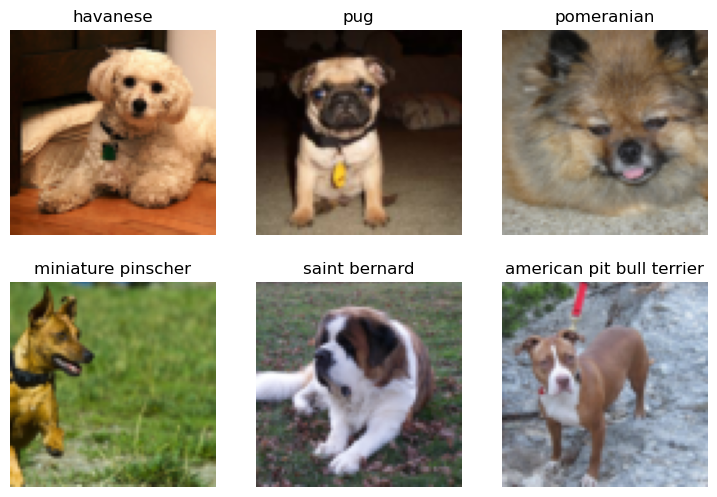

In [6]:
crop_dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2,
    label_func=pet_label_func, item_tfms=[Resize(80, method='crop')])
crop_dls.show_batch(max_n=6)

In [7]:
#set up dls with augmented data with varying 

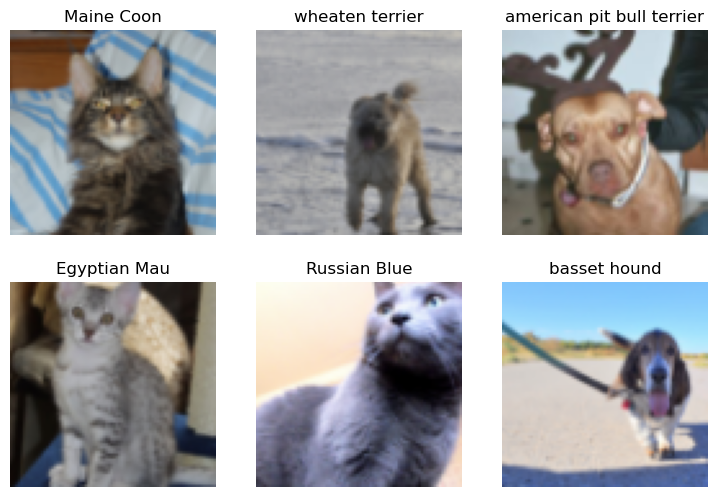

In [8]:
aug01_dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2,
    label_func=pet_label_func, item_tfms=[Resize(80, method='crop')],  batch_tfms=aug_transforms(mult=0.1))
aug01_dls.show_batch(max_n=6)

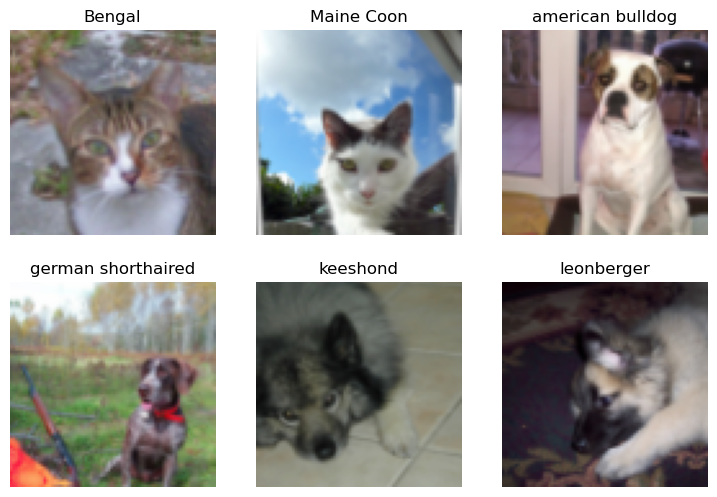

In [9]:
aug05_dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2,
    label_func=pet_label_func, item_tfms=[Resize(80, method='crop')],  batch_tfms=aug_transforms(mult=0.5))
aug05_dls.show_batch(max_n=6)

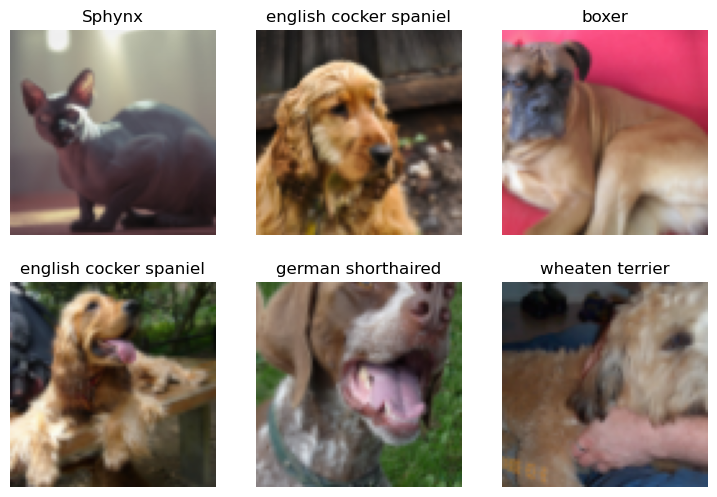

In [10]:
aug1_dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2,
    label_func=pet_label_func, item_tfms=[Resize(80, method='crop')],  batch_tfms=aug_transforms(mult=1))
aug1_dls.show_batch(max_n=6)

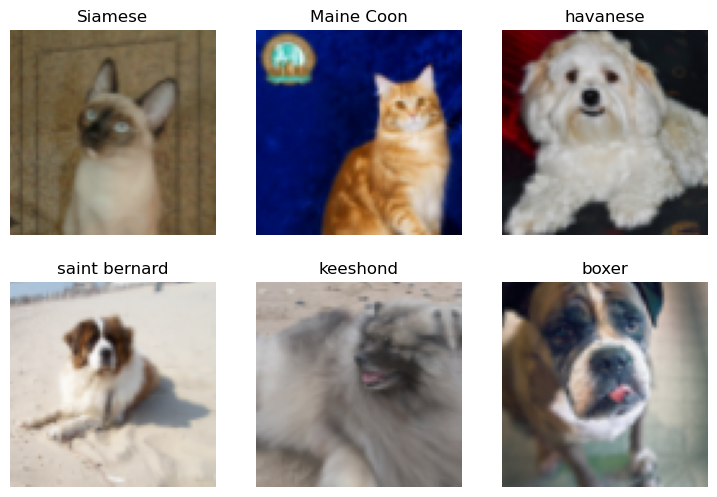

In [11]:
aug15_dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2,
    label_func=pet_label_func, item_tfms=[Resize(80, method='crop')],  batch_tfms=aug_transforms(mult=1.5))
aug15_dls.show_batch(max_n=6)

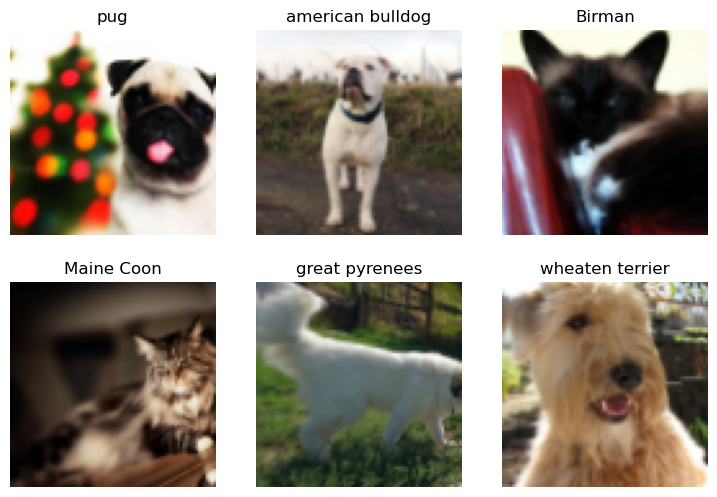

In [12]:
aug2_dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2,
    label_func=pet_label_func, item_tfms=[Resize(80, method='crop')],  batch_tfms=aug_transforms(mult=2))
aug2_dls.show_batch(max_n=6)

In [13]:
def get_plot_data(dls): 
    model = vision_learner(dls, resnet18, metrics=error_rate, cbs=CSVLogger())
    model.fine_tune(10)
    df = model.csv_logger.read_log() 
    return df



In [14]:
crop = get_plot_data(crop_dls)
aug01 = get_plot_data(aug01_dls)
aug05 = get_plot_data(aug05_dls)
aug1 = get_plot_data(aug1_dls)
aug15 = get_plot_data(aug15_dls)
aug2 = get_plot_data(aug2_dls)

/opt/conda/lib/python3.7/site-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/opt/conda/lib/python3.7/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,3.512205,2.190228,0.606901,00:45


epoch,train_loss,valid_loss,error_rate,time
0,2.123986,1.694624,0.488498,00:42
1,1.676216,1.388733,0.407984,00:42
2,1.273541,1.272632,0.368742,00:42
3,0.932133,1.229033,0.363329,00:42
4,0.681197,1.189306,0.321380,00:42
5,0.449704,1.168845,0.326793,00:43
6,0.316605,1.198043,0.317997,00:42
7,0.236284,1.170551,0.311908,00:42
8,0.182463,1.157014,0.307172,00:43
9,0.151758,1.162749,0.310555,00:42


epoch,train_loss,valid_loss,error_rate,time
0,3.528341,1.999764,0.559540,00:42


epoch,train_loss,valid_loss,error_rate,time
0,2.254333,1.621882,0.466170,00:43
1,1.783611,1.334152,0.392422,00:42
2,1.431905,1.189379,0.359269,00:43
3,1.146531,1.134668,0.332882,00:43
4,0.898378,1.086083,0.312585,00:43
5,0.708805,1.069028,0.304466,00:44
6,0.553776,1.058209,0.291610,00:43
7,0.453271,1.047740,0.281461,00:44
8,0.367845,1.054693,0.284168,00:43
9,0.357434,1.063877,0.287551,00:43


epoch,train_loss,valid_loss,error_rate,time
0,3.548097,2.101526,0.575101,00:43


epoch,train_loss,valid_loss,error_rate,time
0,2.301464,1.657495,0.471583,00:43
1,1.828349,1.370330,0.397158,00:43
2,1.462395,1.227192,0.341678,00:43
3,1.183321,1.203386,0.347767,00:43
4,0.921094,1.144797,0.327470,00:43
5,0.780967,1.089429,0.311908,00:42
6,0.619115,1.064106,0.296346,00:43
7,0.511844,1.052041,0.298376,00:43
8,0.440216,1.028747,0.290934,00:43
9,0.420808,1.021485,0.288904,00:43


epoch,train_loss,valid_loss,error_rate,time
0,3.633843,2.083174,0.562246,00:44


epoch,train_loss,valid_loss,error_rate,time
0,2.307001,1.609583,0.460081,00:43
1,1.906861,1.344652,0.386333,00:43
2,1.559196,1.249096,0.359269,00:43
3,1.299608,1.175554,0.343031,00:43
4,1.079233,1.075395,0.308525,00:43
5,0.879375,1.049066,0.301083,00:42
6,0.731235,0.990085,0.290257,00:43
7,0.636074,0.981288,0.291610,00:43
8,0.575608,0.975498,0.292287,00:42
9,0.538487,0.978188,0.283491,00:43


epoch,train_loss,valid_loss,error_rate,time
0,3.698324,1.984521,0.539242,00:42


epoch,train_loss,valid_loss,error_rate,time
0,2.550893,1.571098,0.446549,00:43
1,2.051831,1.303421,0.372801,00:43
2,1.792539,1.227891,0.341678,00:42
3,1.469313,1.149373,0.335589,00:43
4,1.257696,1.053017,0.295670,00:43
5,1.067713,0.996362,0.288227,00:42
6,0.953132,0.922748,0.271313,00:43
7,0.818557,0.935044,0.282138,00:43
8,0.762855,0.940062,0.272666,00:42
9,0.764060,0.931579,0.274019,00:43


epoch,train_loss,valid_loss,error_rate,time
0,3.895938,2.000808,0.563599,00:42


epoch,train_loss,valid_loss,error_rate,time
0,2.710901,1.561384,0.452639,00:42
1,2.293108,1.296774,0.383627,00:43
2,1.927164,1.249967,0.368742,00:42
3,1.659660,1.135988,0.339648,00:43
4,1.489052,1.055885,0.334912,00:42
5,1.316156,1.015137,0.315291,00:42
6,1.158683,0.931275,0.295670,00:43
7,1.075618,0.909683,0.289581,00:42
8,0.998776,0.920495,0.286198,00:43
9,1.004393,0.915683,0.282815,00:43


Text(0.5, 1.0, 'Error rate with different levels of data-augmentation')

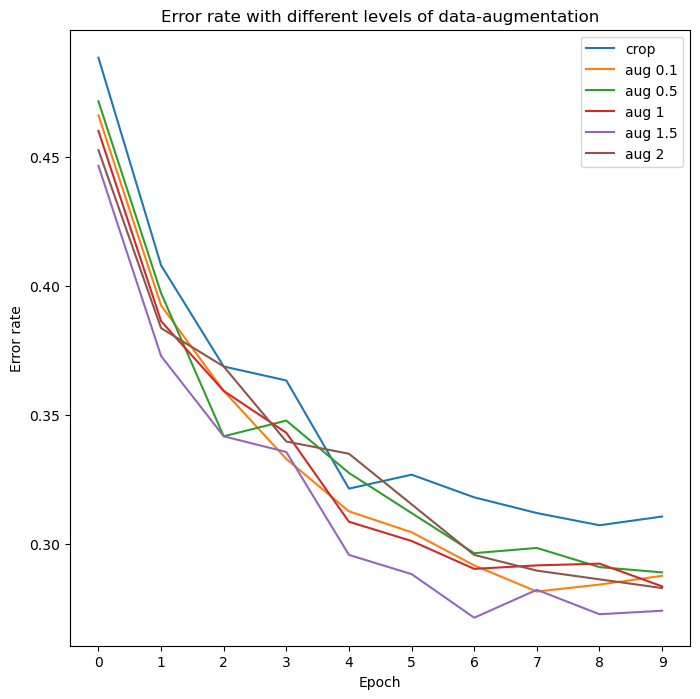

In [15]:
csvs = [crop, aug01, aug05, aug1, aug15, aug2]
plt.figure(figsize = (8,8))
for i in csvs:
    plt.plot(i['epoch'], i['error_rate'])
    plt.xticks(i['epoch'])

plt.xlabel("Epoch")

plt.ylabel("Error rate")
plt.legend(['crop','aug 0.1','aug 0.5', 'aug 1', 'aug 1.5', 'aug 2'])

plt.title("Error rate with different levels of data-augmentation")

